# SARIMAX

#### Defintion:
- Seasonality
- Auto regressive: past values to predict future values 
- Integrated:
- Moving Average: past errors to forecast future values
#### Features:
- Requires data to be stationary i.e. it has some pattern
- Allows external regressors (moving seasonality - black friday, diwali, events outside company like corona, events caused by company like major investment) 
#### Optimizing Factors:
- p, P: order of autoregressive (no. of unknown terms that multiply your signal at past times
- d, D: degree of 1st differencing for stationary data 
- q, Q: order of moving average part 


In [1]:
!pip install pmdarima

# Import libraries and data


In [2]:
#import libraries
import pandas as pd
import numpy as np

In [4]:
#get the data
data = pd.read_csv("Daily Bike Sharing.csv", 
                   index_col = "dteday", 
                   parse_dates = True)
data.head(1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [5]:
#select variables
dataset = data.loc[:, ["cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
dataset.head(1)                       

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


# Data Transformation

In [6]:
#renaming variable
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [7]:
#index
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

# Visualization

<AxesSubplot:xlabel='dteday'>

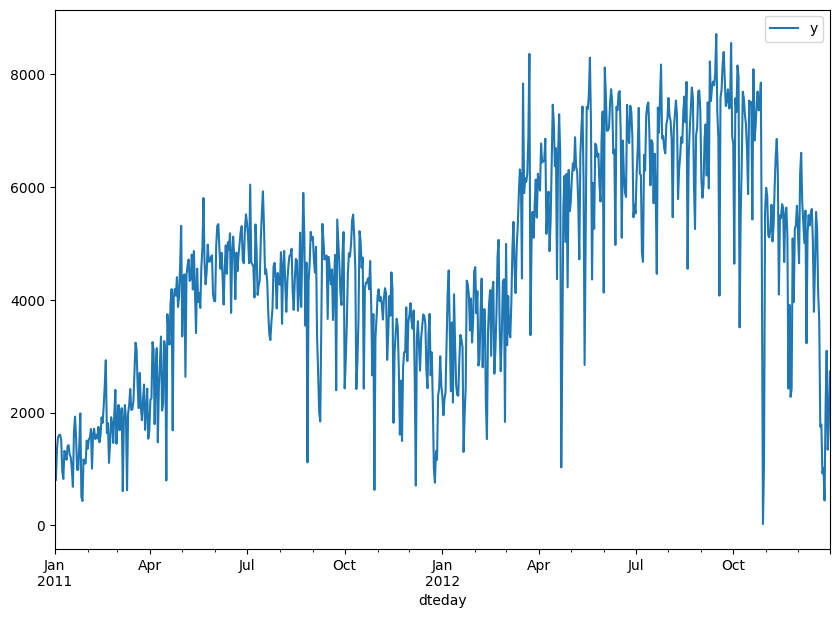

In [8]:
#viz
dataset["y"].plot(figsize = (10, 7), legend = True)

# Stationarity

In [11]:
#stationarity 

from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(dataset['y'])
print('Augmented Dickey Fuller p-value: %F' % stationarity[1])

Augmented Dickey Fuller p-value: 0.342743


# Training and Test Set

In [12]:
#Training and test set
test_days = 31
training_set = dataset.iloc[:-test_days, :]
test_set = dataset.iloc[-test_days:, :]
test_set.tail(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-31,2729,0,1,2,0.215833,0.223487,0.5775,0.154846


# SARIMAX Model

In [13]:
#exogenous variables
train_exog = training_set.iloc[:,1:]
test_exog = test_set.iloc[:,1:]
test_exog.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,
2012-12-01,0,0,2,0.298333,0.316904,0.806667,0.059704
2012-12-02,0,0,2,0.347500,0.359208,0.823333,0.124379
2012-12-03,0,1,1,0.452500,0.455796,0.767500,0.082721
2012-12-04,0,1,1,0.475833,0.469054,0.733750,0.174129
2012-12-05,0,1,1,0.438333,0.428012,0.485000,0.324021


In [14]:
#libraries
from pmdarima import auto_arima

In [28]:
#forecasting model
model = auto_arima(y = training_set['y'],
                  X = train_exog,
                  m = 7,
                  seasonal = True,
                  stepwise = False)

In [29]:
#summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -5596.921
Date:                Tue, 19 Mar 2024   AIC                          11217.842
Time:                        16:23:34   BIC                          11272.438
Sample:                    01-01-2011   HQIC                         11238.948
                         - 11-30-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.3786      5.563      0.787      0.431      -6.525      15.282
holiday     -240.6071    129.157     -1.863      0.062    -493.750      12.536
workingday    89.6453     60.552      1.480      0.139     -29.034     208.324
weathersit  -459.7528     51.321     -8.958      0.000    -560.340    -359.166
temp        3421.4269   1171.111      2.922      0.003    1126.092    5716.762
atemp       1970.4030   1197.727      1.645      0.100    -377.099    4317.905
hum        -2280.0718    198.556    -11.483      0.000   -2669.235   -1890.908
windspeed  -2275.8092    373.473     -6.094      0.000   -3007.803   -1543.816
ma.L1         -0.5548      0.028    -19.644      0.000      -0.610      -0.499
ma.L2         -0.1350      0.039     -3.427      0.001      -0.212      -0.058
ma.L3         -0.1439      0.040     -3.598      0.000      -0.222      -0.066
sigma2      5.264e+05   2.02e+04     26.099      0.000    4.87e+05    5.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               624.40
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.51   Skew:                            -0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
#predictions
predictions_sarimax = pd.Series(model.predict(n_periods=test_days, 
                             X = test_exog)).rename('SARIMAX')
predictions_sarimax.index = test_set.index
predictions_sarimax

dteday
2012-12-01    4288.944788
2012-12-02    4217.014940
2012-12-03    5448.594067
2012-12-04    5427.853272
2012-12-05    5449.101402
2012-12-06    4780.030951
2012-12-07    4190.787558
2012-12-08    4177.902314
2012-12-09    4076.589608
2012-12-10    4318.664070
2012-12-11    4357.231969
2012-12-12    4525.662223
2012-12-13    5072.116338
2012-12-14    4767.504348
2012-12-15    4954.241721
2012-12-16    4275.547125
2012-12-17    4387.102088
2012-12-18    5196.142034
2012-12-19    4977.434373
2012-12-20    4520.416866
2012-12-21    4150.576141
2012-12-22    4375.699937
2012-12-23    4812.738900
2012-12-24    3894.242701
2012-12-25    3764.377369
2012-12-26    2790.745898
2012-12-27    3616.499515
2012-12-28    4260.460875
2012-12-29    3849.564384
2012-12-30    4400.659802
2012-12-31    4113.032642
Freq: D, Name: SARIMAX, dtype: float64

<AxesSubplot:xlabel='dteday'>

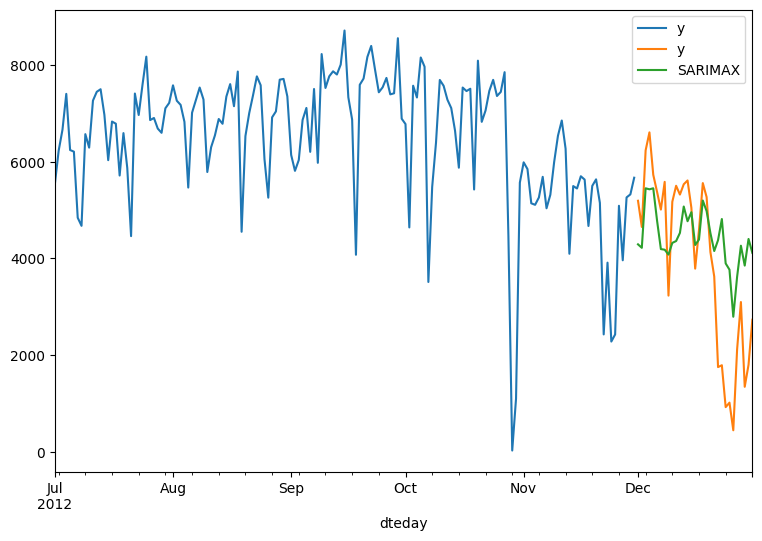

In [31]:
#visualization
training_set['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_sarimax.plot(legend = True)

# Model Assessment

In [32]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_sarimax),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_sarimax)), 0))

1180.0
1480.0


In [33]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_sarimax)

71.29802910896758

# Export Forecasts

In [34]:
predictions_sarimax.to_csv('predictions_sarimax.csv', index = True)